Load the dataset and display the first few rows.

Explanation: This helps us get an initial understanding of the data structure and the types of variables we have.

In [52]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('BankChurners_clean.csv')

# Display the first few rows of the dataset
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Summary statistics and data types.

Explanation: Provides insights into the distribution of the data, missing values, and the data type of each column.
Recommendation: Ensure that all numerical columns are correctly identified and handle any missing values appropriately.

In [53]:
# Generate summary statistics
summary_stats = data.describe()

# Check data types
data_types = data.dtypes

summary_stats, data_types

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

Visualizations of key metrics.

Explanation: Visualizations can help identify patterns, outliers, or any anomalies in the data.
Recommendation: Look for any patterns that might indicate reasons for churn.

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


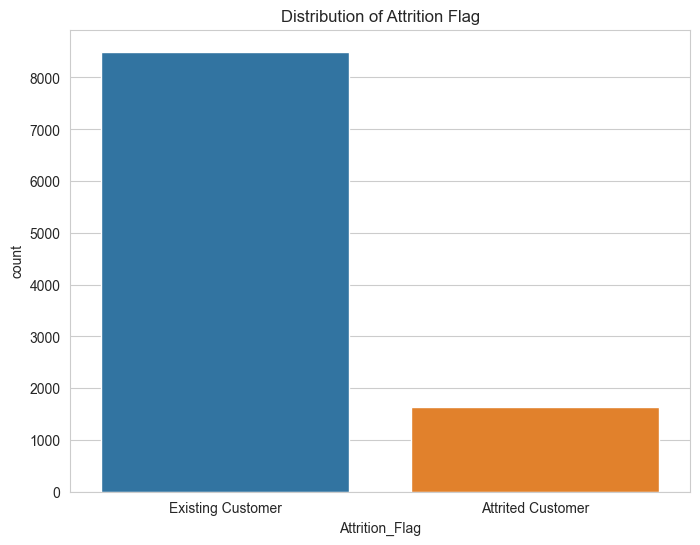

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style('whitegrid')

# Visualize distribution of 'Attrition_Flag' (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.show()

Handle missing values.

Explanation: Missing values can affect the performance of machine learning models. Depending on the nature of the data, we might fill them with mean/median or drop them.

In [55]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]

Series([], dtype: int64)

Convert categorical variables to numerical (One-Hot Encoding or Label Encoding).

Explanation: Machine learning models require numerical input, so we need to convert categorical data.

In [56]:
# Convert 'Attrition_Flag' to numerical using Label Encoding
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Use One-Hot Encoding for other categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,False,False,False,True,False,False,False,False,False,False
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,True,False,False,False,False,True,False,False,False,False
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,False,False,False,False,True,False,False,False,False,False
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,False,True,False,False,False,True,False,False,False,False
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,False,False,False,True,False,False,False,False,False,False


 Feature scaling.

Explanation: Ensures that all features have the same scale. This is especially important for algorithms that rely on distance metrics, like KMeans.

In [57]:
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = data_encoded.drop('Attrition_Flag', axis=1)
y = data_encoded['Attrition_Flag']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
X_scaled[:5]

array([[ 8.02878101e-01, -1.65405580e-01,  5.03368127e-01,
         3.84620878e-01,  7.63942609e-01, -1.32713603e+00,
         4.92403766e-01,  4.46621903e-01, -4.73422218e-01,
         4.88970818e-01,  2.62349444e+00, -9.59706574e-01,
        -9.73895182e-01,  3.83400260e+00, -7.75882235e-01,
         1.05995565e+00, -2.15893885e-01, -6.68521495e-01,
         2.00768518e+00, -2.31707751e-01, -4.14857182e-01,
        -4.20075892e-01,  1.07733799e+00, -7.98506854e-01,
        -2.82608874e-01, -4.63363280e-01,  2.49464476e+00,
        -4.22675481e-01, -7.36436911e-01, -3.51212147e-01,
        -1.07644108e-01, -4.44840034e-02, -2.40793715e-01],
       [ 2.15686101e+00,  3.33570383e-01,  2.04319867e+00,
         1.01071482e+00,  1.40730617e+00, -1.32713603e+00,
        -4.11615984e-01, -4.13666521e-02, -3.66666822e-01,
        -8.48598788e-03,  3.56329284e+00, -9.16432607e-01,
        -1.35734038e+00,  1.26085729e+01, -6.16275655e-01,
        -9.43435701e-01, -2.15893885e-01,  1.49583822e+

# 3. Model Building for Classification

Split the data into training and test sets.

Explanation: We need separate datasets to train our model and to evaluate its performance.

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7088, 33), (3039, 33), (7088,), (3039,))

Split the data into training and test sets.

Explanation: We need separate datasets to train our model and to evaluate its performance.

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Display the first few predictions
y_pred_rf[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Display the first few predictions
y_pred_gb[:5]

array([0, 0, 0, 0, 0], dtype=int64)

Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Explanation: These metrics will give us insights into how well our model is performing.

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Random Forest performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Evaluate Gradient Boosting performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)

rf_metrics = {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1 Score': rf_f1, 'ROC AUC': rf_roc_auc}
gb_metrics = {'Accuracy': gb_accuracy, 'Precision': gb_precision, 'Recall': gb_recall, 'F1 Score': gb_f1, 'ROC AUC': gb_roc_auc}

rf_metrics, gb_metrics

({'Accuracy': 0.9506416584402764,
  'Precision': 0.9368686868686869,
  'Recall': 0.7479838709677419,
  'F1 Score': 0.8318385650224215,
  'ROC AUC': 0.8690764812959041},
 {'Accuracy': 0.9634748272458046,
  'Precision': 0.9365079365079365,
  'Recall': 0.8326612903225806,
  'F1 Score': 0.8815368196371397,
  'ROC AUC': 0.9108253364707672})

# 4. Unsupervised Learning for Clustering

Implement clustering algorithms (KMeans).

Explanation: This will help us group similar customers together.

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kme

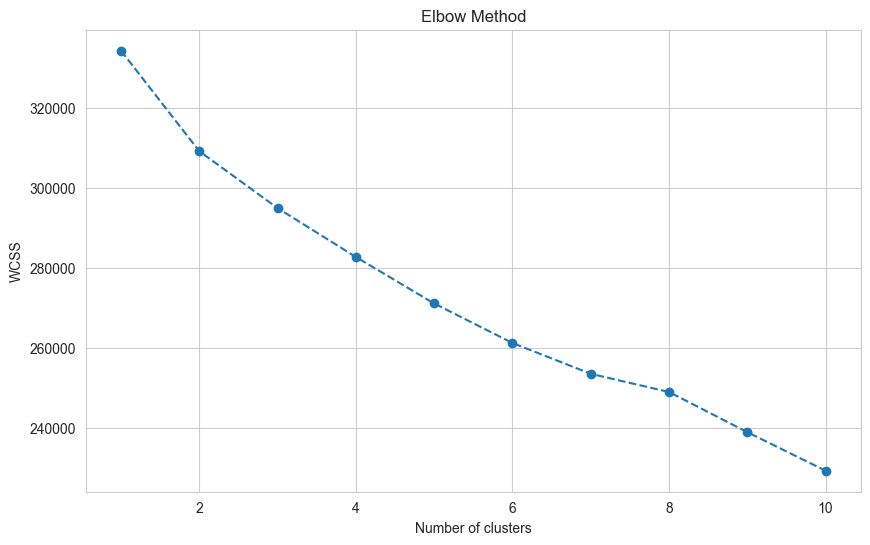

In [62]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
# Apply KMeans clustering with the optimal number of clusters (let's choose 3 for demonstration)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Cluster,,,,,,,,,,,,,,,,,,,,,
0,7.399595e+08,46.314424,2.334880,35.920076,3.919654,2.336989,2.477857,5954.627288,1180.195698,4774.431590,...,0.364192,0.070013,0.353648,0.226698,0.144454,0.000000,0.205609,0.000422,0.000000,0.000422
1,7.391824e+08,46.321748,2.526066,36.003686,3.487098,2.305951,2.467088,24671.449710,1147.179568,23524.270142,...,0.433386,0.091627,0.059505,0.172196,0.447604,0.039494,0.072143,0.060032,0.010532,0.247499
2,7.381114e+08,46.343947,2.263626,35.898738,3.844234,2.366036,2.418244,3536.394005,1147.686747,2388.707258,...,0.399598,0.069707,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.023810


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate Random Forest performance using various metrics
rf_report = classification_report(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Display the classification report and confusion matrix
print('Random Forest Classification Report:')
print(rf_report)
print('Random Forest Confusion Matrix:')
print(rf_cm)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2543
           1       0.94      0.75      0.83       496

    accuracy                           0.95      3039
   macro avg       0.94      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039

Random Forest Confusion Matrix:
[[2518   25]
 [ 125  371]]


In [71]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [72]:
# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                           max_depth=best_params['max_depth'],
                                           min_samples_split=best_params['min_samples_split'],
                                           min_samples_leaf=best_params['min_samples_leaf'],
                                           random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_best_rf = best_rf_classifier.predict(X_test)

# Evaluate the performance
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_rf_classification_report = classification_report(y_test, y_pred_best_rf)
best_rf_confusion_matrix = confusion_matrix(y_test, y_pred_best_rf)

best_rf_accuracy, best_rf_classification_report, best_rf_confusion_matrix

(0.9499835472194801,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      2543\n           1       0.93      0.75      0.83       496\n\n    accuracy                           0.95      3039\n   macro avg       0.94      0.87      0.90      3039\nweighted avg       0.95      0.95      0.95      3039\n',
 array([[2515,   28],
        [ 124,  372]], dtype=int64))

### Gradient Boosting Classifier

Gradient Boosting is a powerful ensemble machine learning algorithm that builds a model in a stage-wise fashion. It generalizes by allowing optimization of an arbitrary differentiable loss function. In each stage, n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

Let's implement the Gradient Boosting Classifier and evaluate its performance on our dataset.

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)
gb_confusion_matrix = confusion_matrix(y_test, y_pred_gb)

gb_accuracy, gb_classification_report, gb_confusion_matrix

(0.9634748272458046,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      2543\n           1       0.94      0.83      0.88       496\n\n    accuracy                           0.96      3039\n   macro avg       0.95      0.91      0.93      3039\nweighted avg       0.96      0.96      0.96      3039\n',
 array([[2515,   28],
        [  83,  413]], dtype=int64))

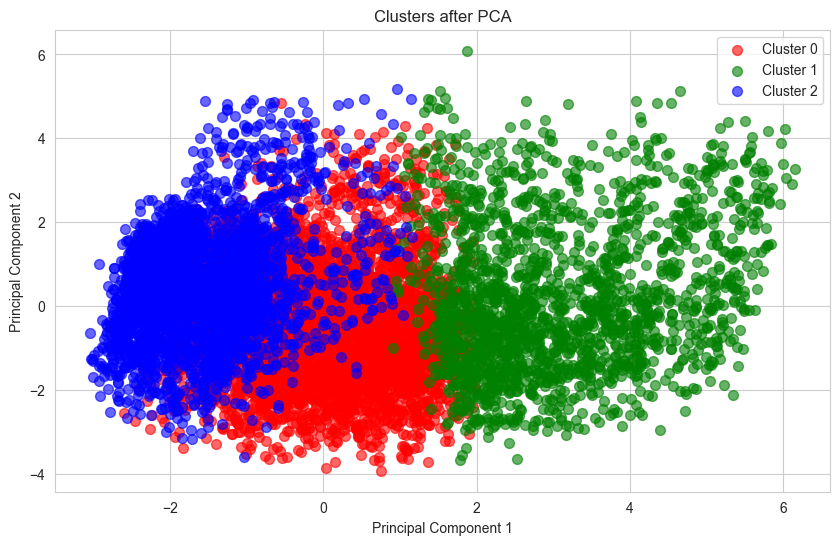

In [74]:
from sklearn.decomposition import PCA

# Apply PCA and reduce the data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components and the cluster labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for cluster, color in zip(range(3), colors):
    plt.scatter(pc_df[pc_df['Cluster'] == cluster]['PC1'],
                pc_df[pc_df['Cluster'] == cluster]['PC2'],
                color=color, s=50, label=f'Cluster {cluster}', alpha=0.6)
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Get the PCA components (loadings)
loadings = pca.components_.T

# Create a DataFrame with the loadings and the feature names
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

# Sort the features based on the magnitude of loadings for PC1
sorted_loadings_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False)

# Sort the features based on the magnitude of loadings for PC2
sorted_loadings_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False)

sorted_loadings_pc1.head(10), sorted_loadings_pc2.head(10)

(Avg_Open_To_Buy                   0.485034
 Credit_Limit                      0.478692
 Gender_M                          0.346065
 Avg_Utilization_Ratio             0.340204
 Income_Category_Less than $40K    0.314151
 Income_Category_$80K - $120K      0.251551
 Card_Category_Silver              0.231337
 Total_Trans_Amt                   0.138111
 Income_Category_$60K - $80K       0.137283
 Card_Category_Gold                0.122452
 Name: PC1, dtype: float64,
 Total_Trans_Ct                    0.543822
 Total_Trans_Amt                   0.520975
 Total_Relationship_Count          0.272157
 Marital_Status_Married            0.242071
 Marital_Status_Single             0.216438
 Gender_M                          0.204229
 Customer_Age                      0.187251
 Months_on_book                    0.183663
 Income_Category_Less than $40K    0.172374
 Contacts_Count_12_mon             0.154226
 Name: PC2, dtype: float64)